# Internet Penetration Rate % Analysis

Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

data = pd.read_csv('ko_ro_data.csv', sep=',')
data.columns = list(map(str.strip, data.columns)) # Aligning column names

# Filter the data for Romania and South Korea
romania_data = data[data['Country'] == 'Romania']
korea_data = data[data['Country'] == 'Korea, Rep.']

# Set the index to the Year column
romania_data.set_index('Year', inplace=True)
korea_data.set_index('Year', inplace=True)


Visualizing the Internet Penetration Rates for both Romania and South Korea

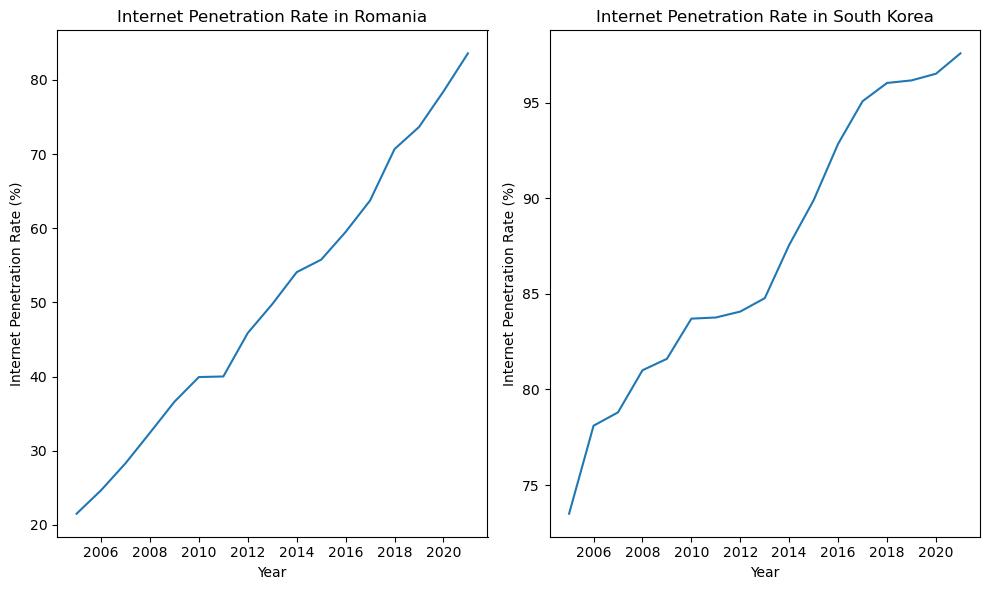

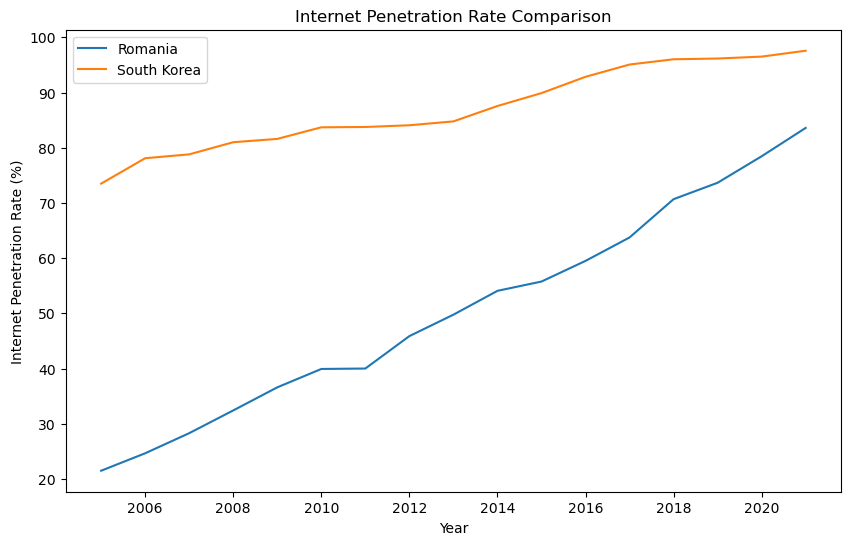

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Internet Penetration Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', ax=axes[0])
axes[0].set_title('Internet Penetration Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Internet Penetration Rate (%)')

# Internet Penetration Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', ax=axes[1])
axes[1].set_title('Internet Penetration Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Internet Penetration Rate (%)')

plt.tight_layout()
plt.show()

# Internet Penetration Rate Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate (%)')
plt.title('Internet Penetration Rate Comparison')
plt.legend()
plt.show()


Visualizing important socio-economic indicators

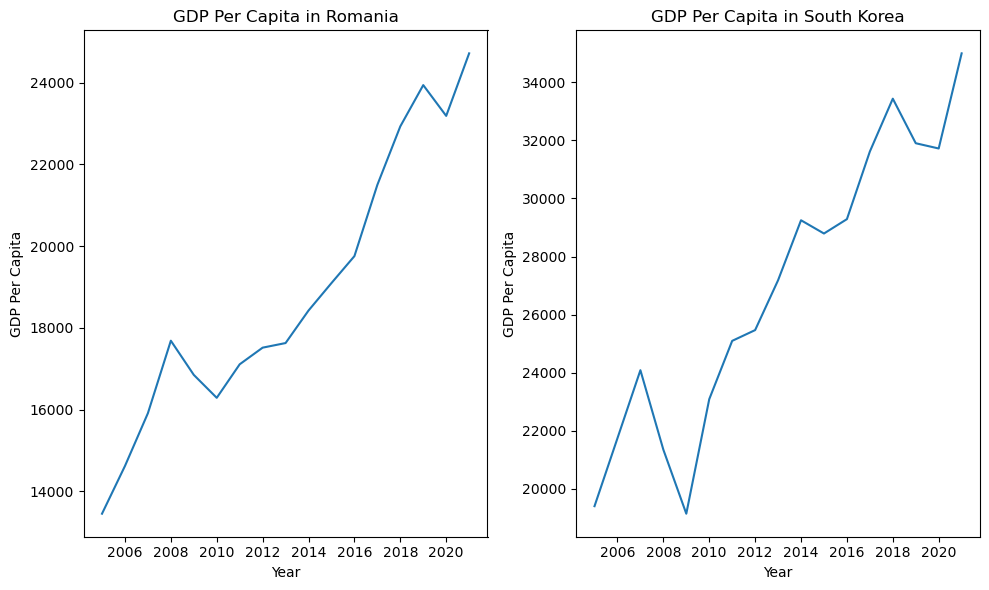

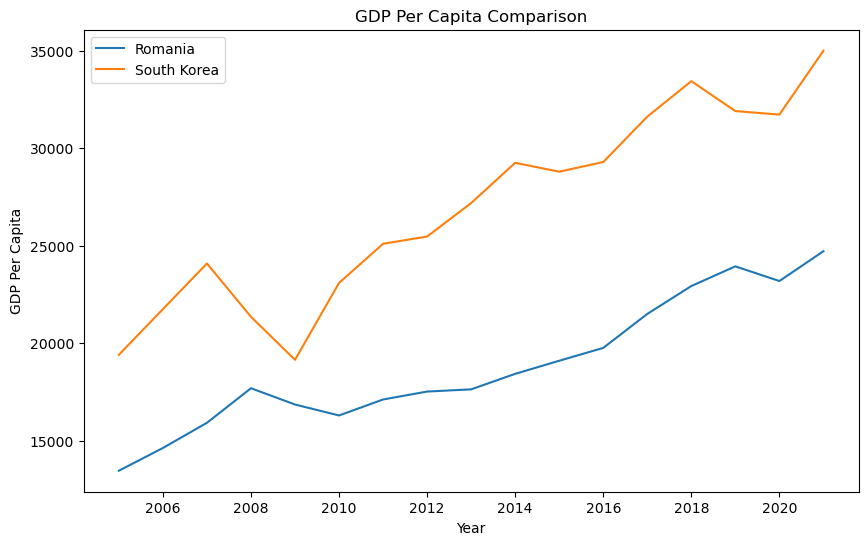

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Per Capita in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', ax=axes[0])
axes[0].set_title('GDP Per Capita in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Per Capita')

# GDP Per Capita in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', ax=axes[1])
axes[1].set_title('GDP Per Capita in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Per Capita')

plt.tight_layout()
plt.show()

# GDP Comparison Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison')
plt.legend()
plt.show()


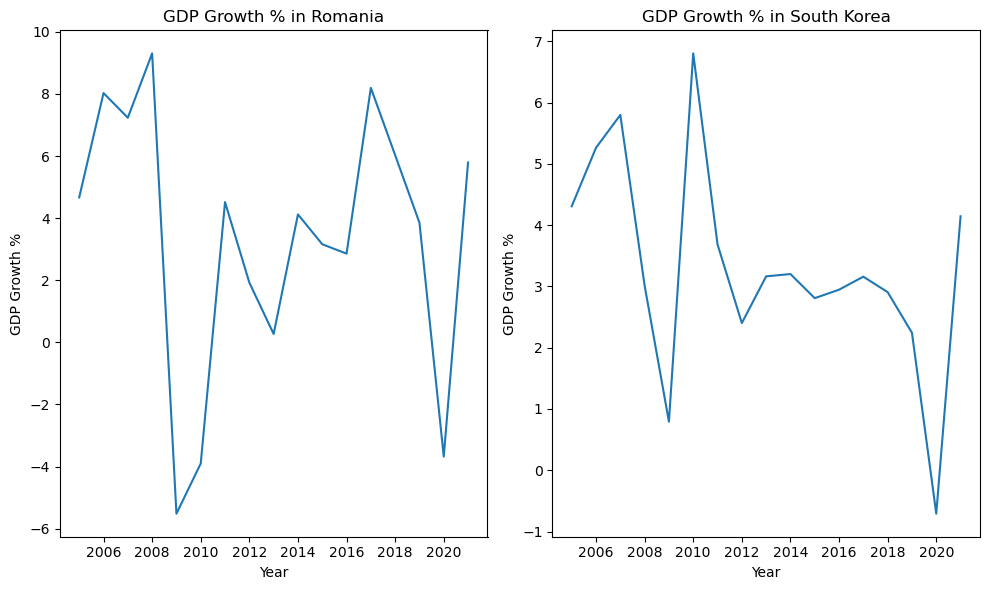

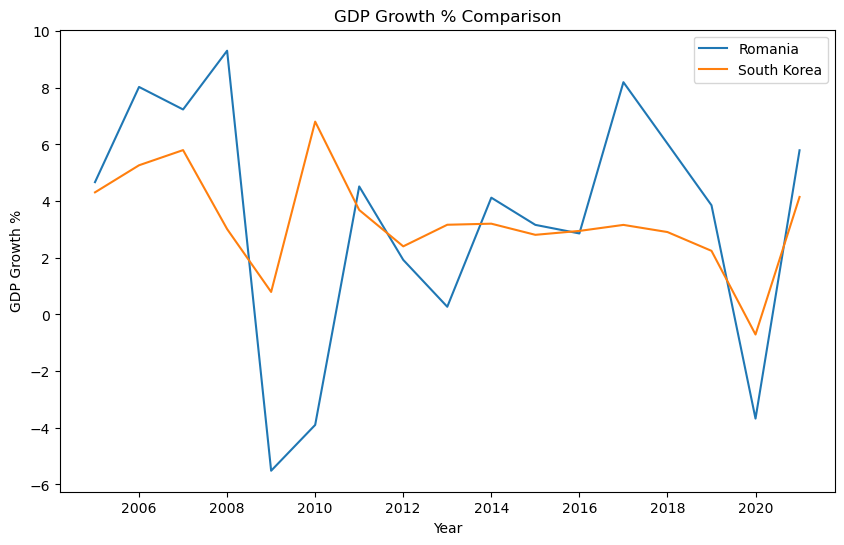

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Growth % in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', ax=axes[0])
axes[0].set_title('GDP Growth % in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Growth %')

# GDP Growth % in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', ax=axes[1])
axes[1].set_title('GDP Growth % in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Growth %')

plt.tight_layout()
plt.show()

# GDP Growth % Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Growth %')
plt.title('GDP Growth % Comparison')
plt.legend()
plt.show()

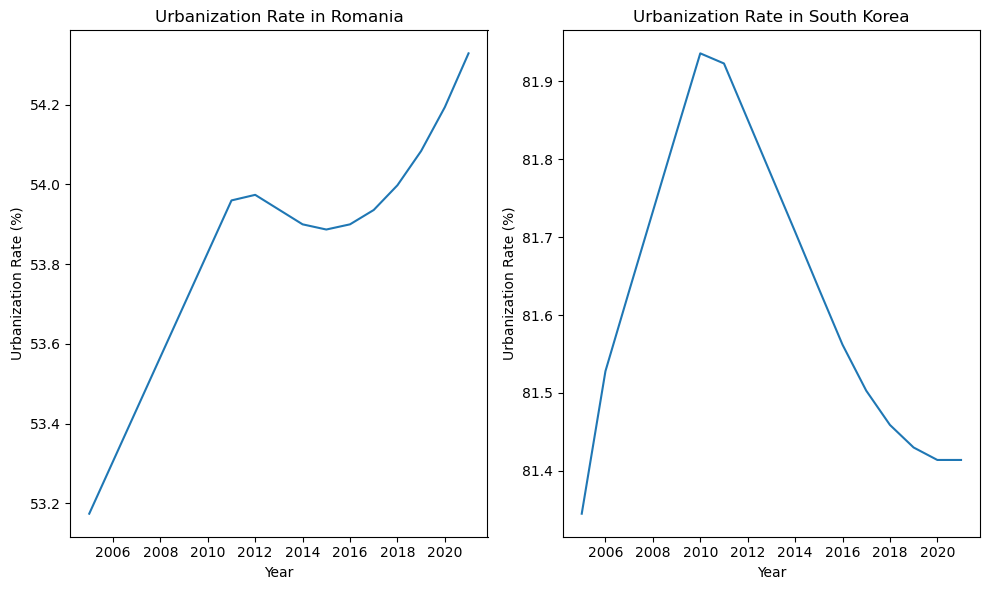

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Urbanization Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Urbanization Rate %', ax=axes[0])
axes[0].set_title('Urbanization Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Urbanization Rate (%)')

# Urbanization Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Urbanization Rate %', ax=axes[1])
axes[1].set_title('Urbanization Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Urbanization Rate (%)')

plt.tight_layout()
plt.show()

C:\Users\Iustin\AppData\Local\Temp\ipykernel_11412\2778637493.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = romania_data.corr()


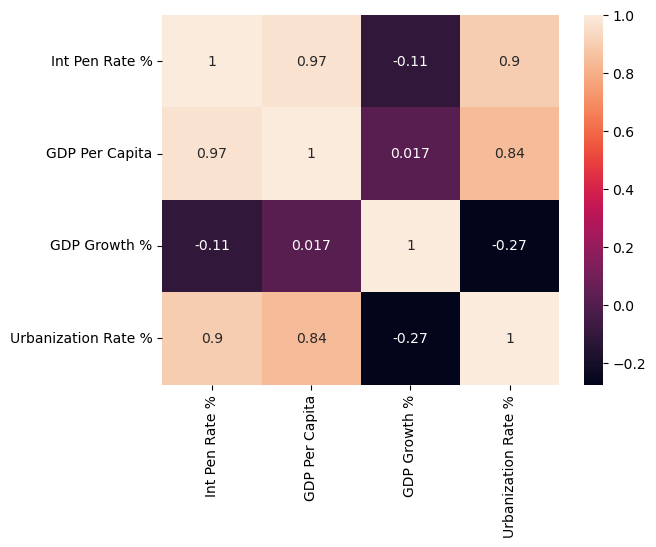

In [6]:
# Romania Coefficients Correlation Heatmap
tc = romania_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

C:\Users\Iustin\AppData\Local\Temp\ipykernel_11412\3540107750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = korea_data.corr()


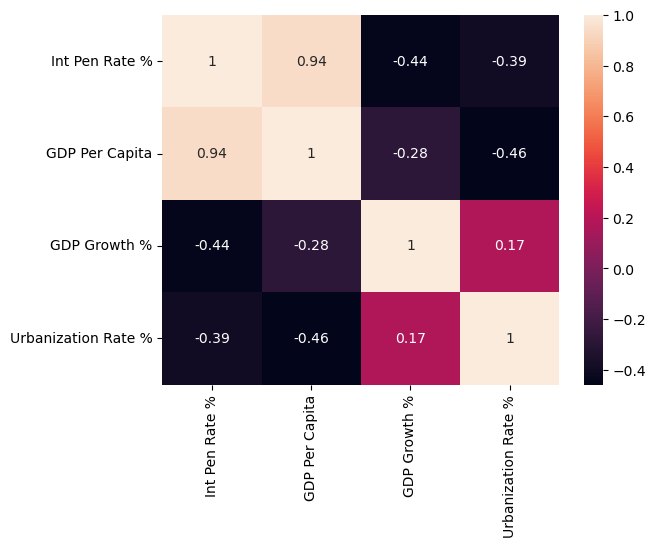

In [7]:
# South Korea Coefficients Correlation Heatmap
tc = korea_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

## ARIMA

### Determining the parameters (p,d,q)

Autocorrelation and Partial Autocorrelation

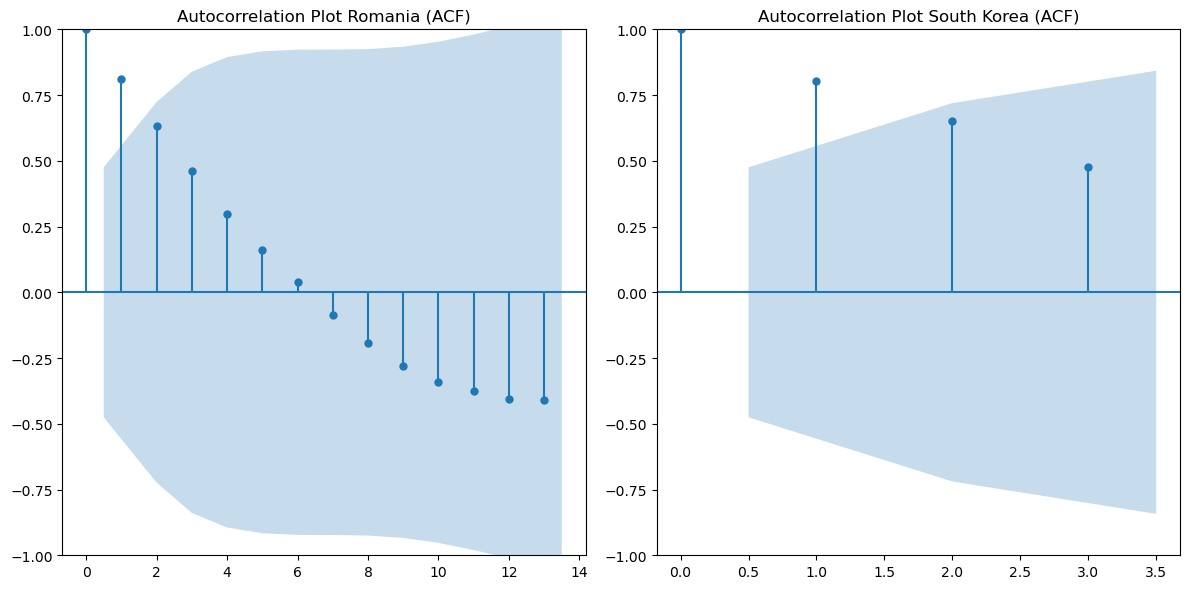

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

int_pen_rate_ro = romania_data[['Int Pen Rate %']]
int_pen_rate_ko = korea_data[['Int Pen Rate %']]

# Autocorrelation plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Romania
tsaplots.plot_acf(int_pen_rate_ro, ax=ax1)
ax1.set_title('Autocorrelation Plot Romania (ACF)')

# US
tsaplots.plot_acf(int_pen_rate_ko, lags=3, ax=ax2)
ax2.set_title('Autocorrelation Plot South Korea (ACF)')

plt.tight_layout()
plt.show()

1st Order Differencing and Autocorrelation 

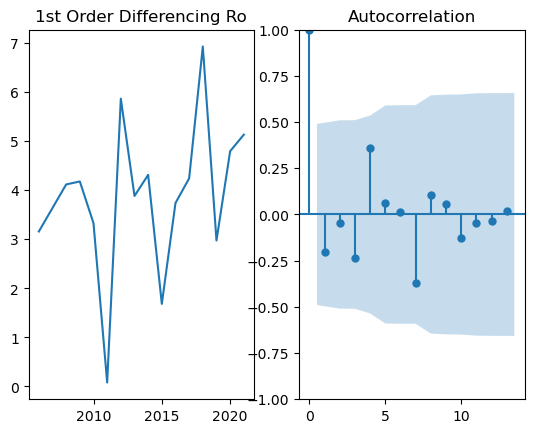

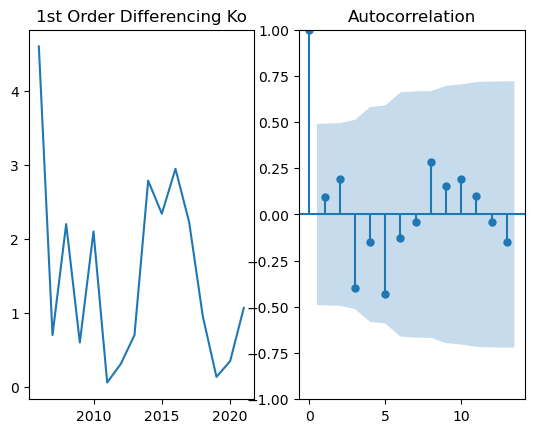

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ro')
ax1.plot(int_pen_rate_ro.diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ro.diff().dropna(), ax = ax2)
plt.show()

# US
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ko')
ax1.plot(int_pen_rate_ko.diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ko.diff().dropna(), ax = ax2)
plt.show()

2nd Order Differencing and Autocorrelation

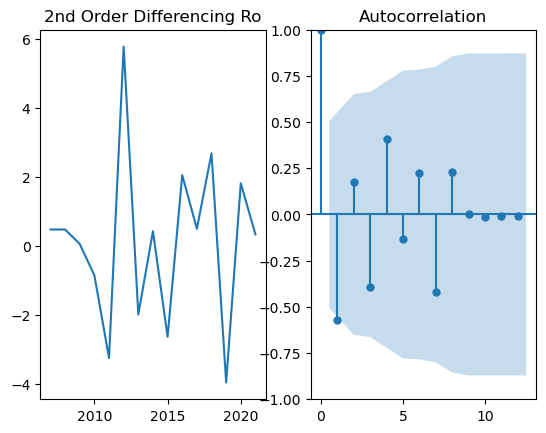

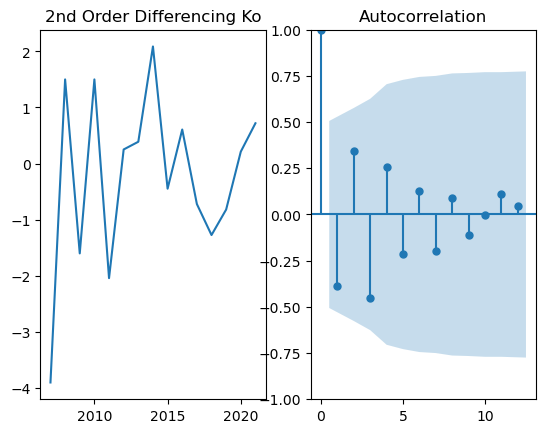

In [10]:
# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ro')
ax1.plot(int_pen_rate_ro.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ro.diff().diff().dropna(), ax = ax2)
plt.show()

# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

# US
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ko')
ax1.plot(int_pen_rate_ko.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(int_pen_rate_ko.diff().diff().dropna(), ax = ax2)
plt.show()
 
# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

Augmented Dickey-Fuller test for stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

print('Romania')
result = adfuller(int_pen_rate_ro.dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ro.diff().dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ro.diff().diff().dropna())
print('p-value:', result[1])
print('\n')

# As we compare the values below, we can see that after the 1st order differencing, the p-value drops below the acceptable threshold of 0.05.
# So the data is stationary.
# Thus we can consider the "d" parameter: number of nonseasonal differencing = 1/2.

print('South Korea')
result = adfuller(int_pen_rate_ko.dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ko.diff().dropna())
print('p-value:', result[1])

result = adfuller(int_pen_rate_ko.diff().diff().dropna())
print('p-value:', result[1])

# "d" parameter = 1/2

Romania
p-value: 1.0
p-value: 0.9881170704384648
p-value: 1.0


South Korea
p-value: 0.9983112933764807
p-value: 0.0008683775374627583
p-value: 0.03765897636135302


<b>Building ARIMA Model for Internet Penetration Rate<b>

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Romania
# Define the order for the ARIMA model
order = (1, 2, 1)

# Create the ARIMA model for Internet Pen Rate
ro_model = ARIMA(romania_data['Int Pen Rate %'], order=order)
ro_model_fit = ro_model.fit()
# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ro_pen_rate = ro_model_fit.forecast(steps=3)

print(ro_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                   17
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -29.244
Date:                Thu, 31 Aug 2023   AIC                             64.488
Time:                        18:46:35   BIC                             66.612
Sample:                             0   HQIC                            64.465
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1903      0.412     -0.462      0.644      -0.998       0.617
ma.L1         -0.8538      0.589     -1.449      0.147      -2.009       0.301
sigma2         2.5915      1.150      2.254      0.0

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
# South Korea

# Create the ARIMA model for Internet Pen Rate
ko_model = ARIMA(korea_data['Int Pen Rate %'], order=(0,2,0))
ko_model_fit = ko_model.fit()
# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ko_pen_rate = ko_model_fit.forecast(steps=3)

print(ko_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                   17
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -27.627
Date:                Thu, 31 Aug 2023   AIC                             57.254
Time:                        18:46:39   BIC                             57.962
Sample:                             0   HQIC                            57.247
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3297      0.755      3.086      0.002       0.850       3.809
Ljung-Box (L1) (Q):                   2.71   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.10   Pr

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<b>Building ARIMA Model for GDP Per Capita<b>

In [14]:
# Romania
ro_model_gdp_per_capita = ARIMA(romania_data['GDP Per Capita'], order=(1,2,2))
ro_model_gdp_per_capita_fit = ro_model_gdp_per_capita.fit()

# Predict the GDP Per Capita for 2022, 2023 and 2024
forecast_ro_gdp_per_capita = ro_model_gdp_per_capita_fit.forecast(steps=3)

print(ro_model_gdp_per_capita_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         GDP Per Capita   No. Observations:                   17
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -125.230
Date:                Thu, 31 Aug 2023   AIC                            258.460
Time:                        18:46:42   BIC                            261.292
Sample:                             0   HQIC                           258.430
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4649      0.739     -0.629      0.529      -1.914       0.984
ma.L1          0.2769      0.580      0.478      0.633      -0.859       1.413
ma.L2         -0.2900      0.283     -1.024      0.3

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<b>Building ARIMA Model for GDP Growth %<b>

In [15]:
# Romania
ro_model_gdp_growth = ARIMA(romania_data['GDP Growth %'], order=(1,2,2))
ro_model_gdp_growth_fit = ro_model_gdp_growth.fit()

# Predict the GDP Growth for 2022, 2023 and 2024
forecast_ro_gdp_growth = ro_model_gdp_growth_fit.forecast(steps=3)

print(ro_model_gdp_growth_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           GDP Growth %   No. Observations:                   17
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -47.707
Date:                Thu, 31 Aug 2023   AIC                            103.413
Time:                        18:46:46   BIC                            106.246
Sample:                             0   HQIC                           103.383
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3426      2.554      0.134      0.893      -4.663       5.348
ma.L1         -1.9673     72.271     -0.027      0.978    -143.615     139.680
ma.L2          0.9984     73.650      0.014      0.9

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<b>Building ARIMA Model for Urbanization Rate %<b>

In [16]:
# Romania 
ro_model_urb_rate = ARIMA(romania_data['Urbanization Rate %'], order=(1,2,2))
ro_model_urb_rate_fit = ro_model_urb_rate.fit()

# Predict the GDP Growth for 2022, 2023 and 2024
forecast_ro_urb_rate = ro_model_urb_rate_fit.forecast(steps=3)

print(ro_model_urb_rate_fit.summary())


                                SARIMAX Results                                
Dep. Variable:     Urbanization Rate %   No. Observations:                   17
Model:                  ARIMA(1, 2, 2)   Log Likelihood                  30.078
Date:                 Thu, 31 Aug 2023   AIC                            -52.155
Time:                         18:46:49   BIC                            -49.323
Sample:                              0   HQIC                           -52.185
                                  - 17                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3781      2.772      0.136      0.891      -5.054       5.810
ma.L1          0.1261      2.866      0.044      0.965      -5.491       5.743
ma.L2         -0.0491      1.379     -0.036 

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Visualizing the predictions for years 2022, 2023 and 2024

In [17]:
# Print the forecasted values
print("Romania\n")
print("Internet Pen Rate % forecast:")
print(forecast_ro_pen_rate)
print("\nGDP Per Capita forecast:")
print(forecast_ro_gdp_per_capita)
print("\nGDP Growth % forecast:")
print(forecast_ro_gdp_growth)
print("\nUrbanization Rate % forecast:")
print(forecast_ro_urb_rate)


Romania

Internet Pen Rate % forecast:
17    87.581479
18    91.790197
19    95.957505
Name: predicted_mean, dtype: float64

GDP Per Capita forecast:
17    26271.009779
18    27257.051296
19    28508.437792
Name: predicted_mean, dtype: float64

GDP Growth % forecast:
17    3.815888
18    3.227176
19    3.114160
Name: predicted_mean, dtype: float64

Urbanization Rate % forecast:
17    54.474622
18    54.623534
19    54.773691
Name: predicted_mean, dtype: float64


In [19]:
# Print the forecasted values
forecast_ko_pen_rate = np.minimum(forecast_ko_pen_rate, 100.0) 
# I used np.minimum to limit the predictions up to 100%, because 2024 got a value of 100.77%
print("South Korea\n")
print("Internet Pen Rate % forecast:")
print(forecast_ko_pen_rate)

South Korea

Internet Pen Rate % forecast:
17     98.637594
18     99.703862
19    100.000000
Name: predicted_mean, dtype: float64


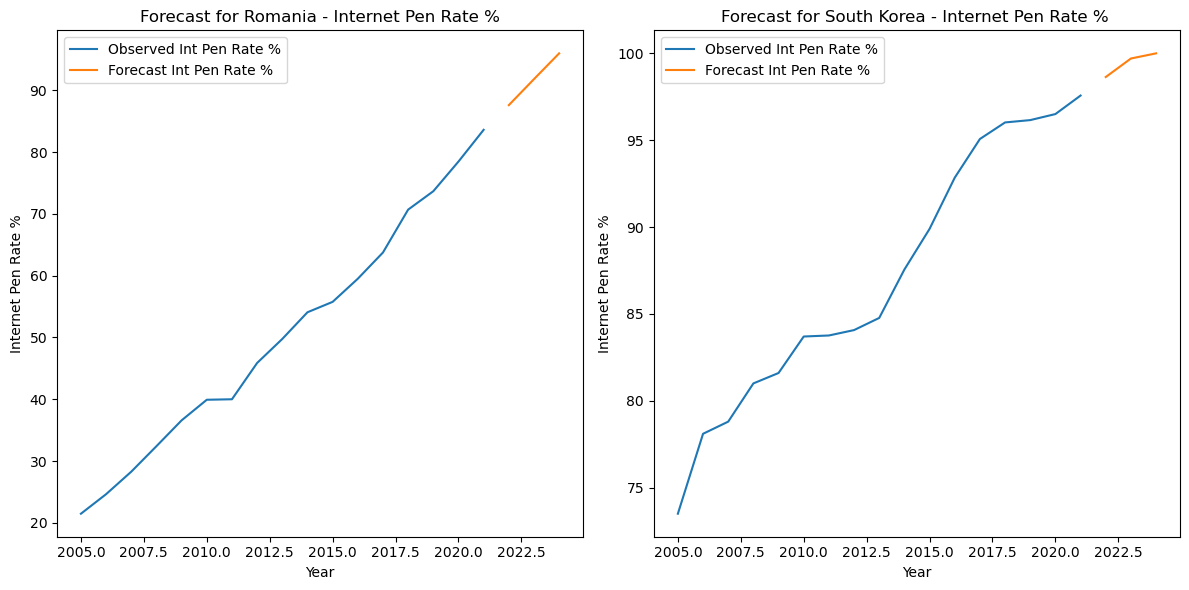

In [20]:
# Create a figure and axis objects for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax1.plot([2022, 2023, 2024], forecast_ro_pen_rate, label='Forecast Int Pen Rate %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Internet Pen Rate %')
ax1.set_title('Forecast for Romania - Internet Pen Rate %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax2.plot([2022, 2023, 2024], forecast_ko_pen_rate, label='Forecast Int Pen Rate %')
ax2.set_xlabel('Year')
ax2.set_ylabel('Internet Pen Rate %')
ax2.set_title('Forecast for South Korea - Internet Pen Rate % ')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

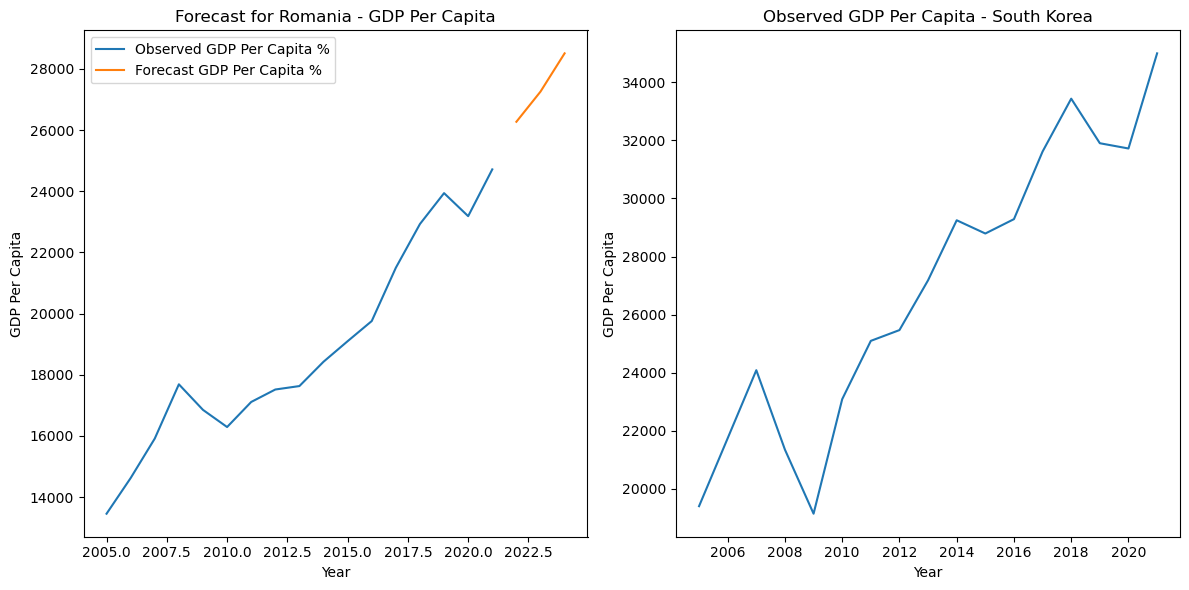

In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['GDP Per Capita'], label='Observed GDP Per Capita %')
ax1.plot([2022, 2023, 2024], forecast_ro_gdp_per_capita, label='Forecast GDP Per Capita %')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Per Capita')
ax1.set_title('Forecast for Romania - GDP Per Capita')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['GDP Per Capita'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP Per Capita')
ax2.set_title('Observed GDP Per Capita - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

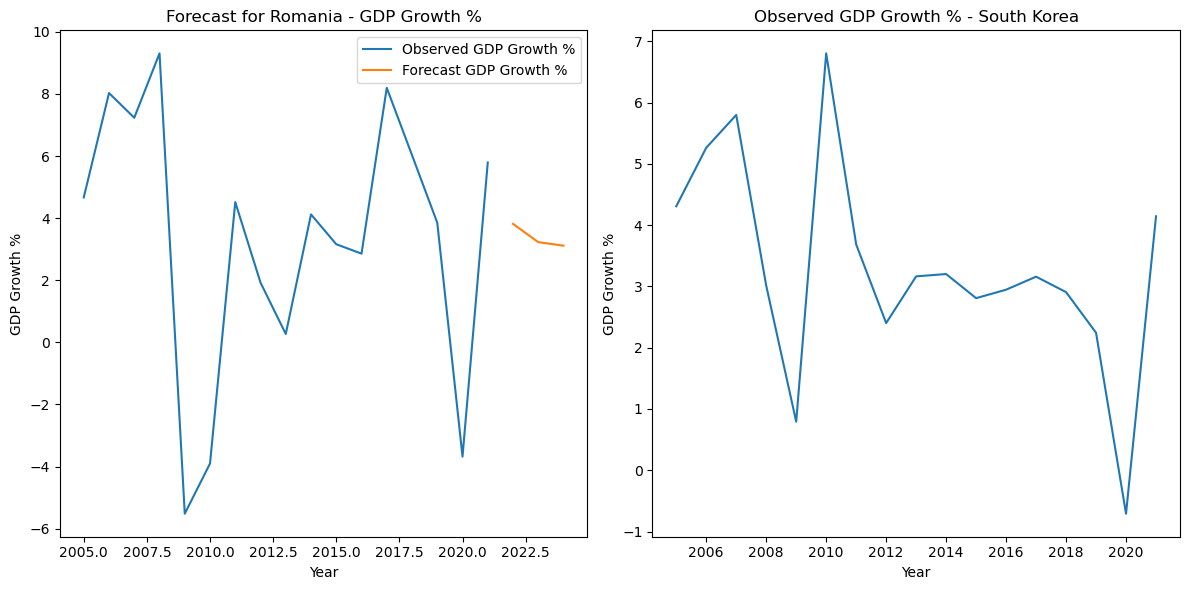

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['GDP Growth %'], label='Observed GDP Growth %')
ax1.plot([2022, 2023, 2024], forecast_ro_gdp_growth, label='Forecast GDP Growth %')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Growth %')
ax1.set_title('Forecast for Romania - GDP Growth %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['GDP Growth %'], label='Observed GDP Growth %')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP Growth %')
ax2.set_title('Observed GDP Growth % - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

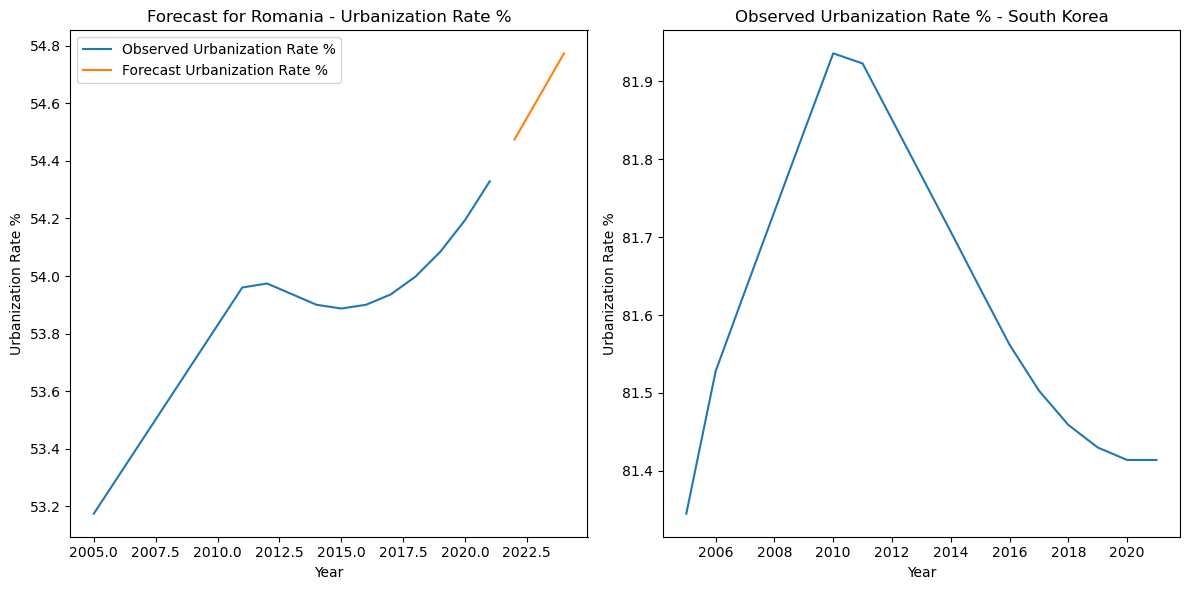

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['Urbanization Rate %'], label='Observed Urbanization Rate %')
ax1.plot([2022, 2023, 2024], forecast_ro_urb_rate, label='Forecast Urbanization Rate %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Urbanization Rate %')
ax1.set_title('Forecast for Romania - Urbanization Rate %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['Urbanization Rate %'], label='Observed Urbanization Rate %')
ax2.set_xlabel('Year')
ax2.set_ylabel('Urbanization Rate %')
ax2.set_title('Observed Urbanization Rate % - South Korea')

# Display the plots
plt.tight_layout()
plt.show()

## Polynomial Regression

### Poly Reg Model 1 with Year as independent variable

In [108]:
from sklearn.model_selection import train_test_split

X = romania_data.index.values.reshape(-1, 1)
y = romania_data['Int Pen Rate %']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

### Making future predictions

In [110]:
# Predict future values (years 2022, 2023, and 2024)
future_years = [2019, 2020, 2021, 2022, 2023, 2024]
future_data = pd.DataFrame({'Year': future_years})

# Create polynomial features for the future years
future_data_poly = poly.transform(future_data)

# Predict internet penetration rates for future years
future_predictions1 = model.predict(future_data_poly)

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


### Visualizing the Polynomial Regression results

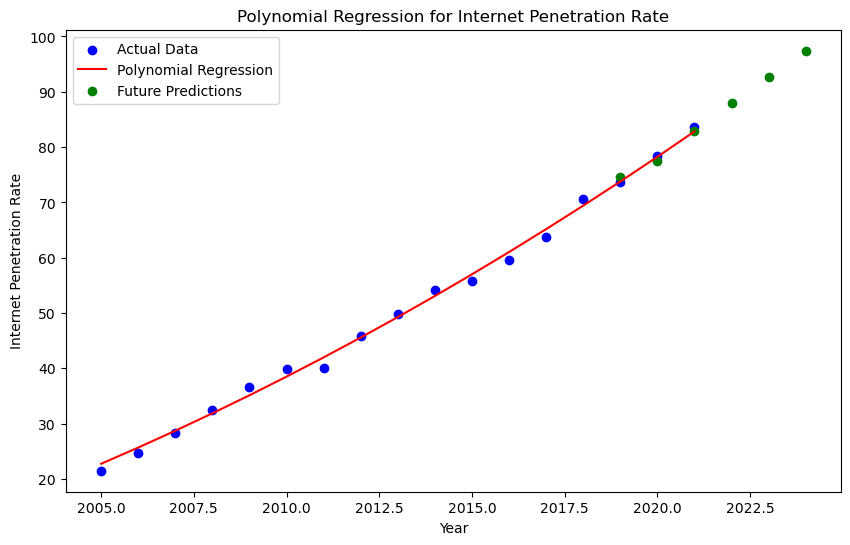

Year 2019: Predicted Internet Penetration Rate = 73.77
Year 2020: Predicted Internet Penetration Rate = 78.24
Year 2021: Predicted Internet Penetration Rate = 82.82
Year 2022: Predicted Internet Penetration Rate = 87.51
Year 2023: Predicted Internet Penetration Rate = 92.31
Year 2024: Predicted Internet Penetration Rate = 97.21


In [111]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(romania_data.index, romania_data['Int Pen Rate %'], label='Actual Data', color='blue')
plt.plot(romania_data.index, model.predict(poly.transform(X)), label='Polynomial Regression', color='red')
plt.scatter(future_years, future_predictions, label='Future Predictions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Polynomial Regression for Internet Penetration Rate')
plt.legend()
plt.show()

# Print the predictions for future years
for year, prediction in zip(future_years, future_predictions1):
    print(f'Year {year}: Predicted Internet Penetration Rate = {prediction:.2f}')

### Model Evaluation on the Training Data

In [94]:
# Make predictions on the training set
y_train_pred = model.predict(X_train_poly)

# Calculate R-squared score for training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

print(f'R-squared Score (Training): {r2_train:.2f}')
print(f'Mean Absolute Error (MAE) (Training): {mae_train:.2f}')
print(f'Mean Squared Error (MSE) (Training): {mse_train:.2f}')
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

R-squared Score (Training): 1.00
Mean Absolute Error (MAE) (Training): 0.92
Mean Squared Error (MSE) (Training): 1.11
Root Mean Squared Error (RMSE) (Training): 1.05


### Model Evaluation on the Test Data

In [95]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'R-squared Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared Score: 0.99
Mean Absolute Error (MAE): 1.12
Mean Squared Error (MSE): 1.55
Root Mean Squared Error (RMSE): 1.24


### Poly Reg Model 2 with Year and GDP Per Capita as independent variables

In [104]:
from sklearn.model_selection import train_test_split

X = np.column_stack((romania_data.index.values, romania_data['GDP Per Capita']))
y = romania_data['Int Pen Rate %']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

### Making future predictions

In [106]:
# Years for prediction (2019 to 2024)
future_years = np.arange(2019, 2025)

# Actual values of the GDP Per Capita for years 2019-2024 required for future predictions
future_gdp_per_capita = [23937.58136, 23184.61479, 24714.24507, 26271.009779, 27257.051296, 28508.437792]
# Create a feature matrix for these years with GDP Per Capita
future_data = np.column_stack((future_years, future_gdp_per_capita))

# Transform the feature matrix with polynomial features
future_data_poly = poly.transform(future_data)

# Predict Internet Penetration Rate for future years
future_predictions2 = model.predict(future_data_poly)

# Print the predictions for future years
for year, prediction in zip(future_years, future_predictions2):
    print(f'Year {year}: Predicted Internet Penetration Rate = {prediction:.2f}')

Year 2019: Predicted Internet Penetration Rate = 74.65
Year 2020: Predicted Internet Penetration Rate = 77.51
Year 2021: Predicted Internet Penetration Rate = 82.83
Year 2022: Predicted Internet Penetration Rate = 87.93
Year 2023: Predicted Internet Penetration Rate = 92.62
Year 2024: Predicted Internet Penetration Rate = 97.42


### Visualizing the results

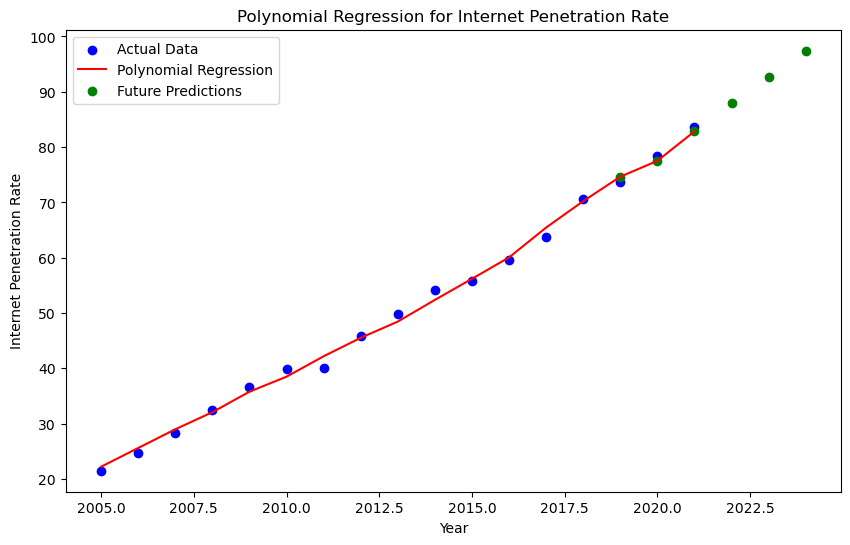

[25.60966449 42.18869596 48.45976539 52.3781124 ]


In [85]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(romania_data.index, romania_data['Int Pen Rate %'], label='Actual Data', color='blue')
plt.plot(romania_data.index, model.predict(poly.transform(X)), label='Polynomial Regression', color='red')
plt.scatter(future_years, future_predictions, label='Future Predictions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Polynomial Regression for Internet Penetration Rate')
plt.legend()
plt.show()

### Model Evaluation on the Training Data

In [88]:
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'R-squared Score (Training): {r2_train:.2f}')
print(f'Mean Absolute Error (MAE) (Training): {mae_train:.2f}')
print(f'Mean Squared Error (MSE) (Training): {mse_train:.2f}')
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

R-squared Score (Training): 1.00
Mean Absolute Error (MAE) (Training): 0.78
Mean Squared Error (MSE) (Training): 0.77
Root Mean Squared Error (RMSE) (Training): 0.88


### Model Evaluation on the Test Data

In [86]:
# Calculate evaluation metrics for the test data
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared Score (Test): {r2:.2f}')
print(f'Mean Absolute Error (MAE) (Test): {mae:.2f}')
print(f'Mean Squared Error (MSE) (Test): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) (Test): {rmse:.2f}')

R-squared Score (Test): 0.98
Mean Absolute Error (MAE) (Test): 1.53
Mean Squared Error (MSE) (Test): 2.56
Root Mean Squared Error (RMSE) (Test): 1.60


### Visualizing the predictions of Model 1 and Model 2

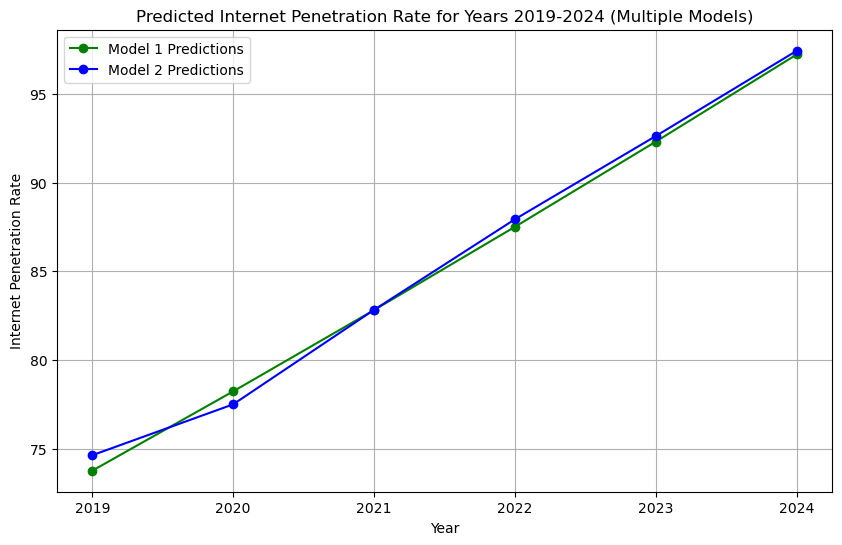

In [112]:
# Years for prediction (2019 to 2024)
future_years = np.arange(2019, 2025)

# Plot both sets of predictions
plt.figure(figsize=(10, 6))

# Plot predictions from model 1
plt.plot(future_years, future_predictions1, marker='o', linestyle='-', color='green', label='Model 1 Predictions')

# Plot predictions from model 2
plt.plot(future_years, future_predictions2, marker='o', linestyle='-', color='blue', label='Model 2 Predictions')

plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Predicted Internet Penetration Rate for Years 2019-2024 (Multiple Models)')
plt.legend()
plt.grid(True)
plt.show()